In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_data.csv')

In [3]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='node-caps'>

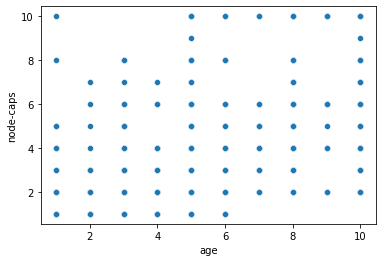

In [4]:
x = df['age']
y = df['node-caps']
sns.scatterplot(x, y)

In [5]:
beta0 = 0
beta1 = 1
alpha = 0.01
count = 10000
n = float(len(x))

In [6]:
for i in range(count):
    Ybar = beta1*x + beta0
    beta1 = beta1 - (alpha/n)*sum(x*(Ybar-y))
    beta0 = beta0 - (alpha/n)*sum(Ybar-y)
    
print(beta0, beta1)

1.4011822109298724 0.41265410347221737


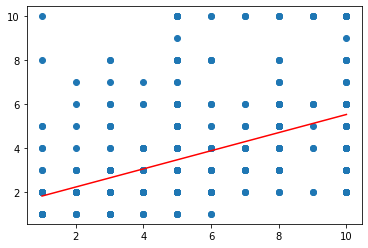

In [7]:
Ybar = beta1*x + beta0
plt.scatter(x,y)
plt.plot([min(x), max(x)], [min(Ybar), max(Ybar)], color= 'red') 
plt.show()

In [9]:
import math
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))
    
    rse = math.sqrt(RSS/(len(y_true) -2))
    return rse

rse = RSE(df['breast'], Ybar)
print(rse)

2.061242755329335


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
x = np.array(df['breast']).reshape(-1, 1)
y = np.array(df['age']).reshape(-1, 1)

lr = LinearRegression()
lr.fit(x,y)

print(lr.coef_)
print(lr.intercept_)

yp = lr.predict(x)
rse = RSE(y, yp)

print(rse)

[[0.6376199]]
[2.24550568]
2.3505379952192635
